## Obliczanie i graficzne przedstawienie na wykresie dwustopniowego obiegu pompy ciepła

In [1]:
# get rid of error messages
import warnings;warnings.simplefilter('ignore')

# set up modules
%pylab inline
rcParams['savefig.dpi'] = 120
%config InlineBackend.figure_format = 'retina'

import math
from scipy.integrate import odeint

import CoolProp
import CoolProp.CoolProp as CP

Populating the interactive namespace from numpy and matplotlib


# Założenia projektowe

Celem zadania jest zaprojektowanie systemu pompy ciepła. 

In [2]:
Q_k = 15 * 1e3 # [kW] - wydajność grzewcza projektowanej pompy ciepła

# Obliczenia obiegu pompy ciepła

In [3]:
T_0 = 3 + 273.15 # [K] - temperatura wrzenia czynnika chłodniczego
T_k = 40 + 273.15 # [K] - temperatura skraplania czynnika chłodniczego
dT_sup = 20 # [°C] - przegrzanie

n_iz = 0.5 # współczynnik sprawności izentropowej sprężarki

In [4]:
# czynnik chłodniczy
refrigerant = "R22"

#### Obliczanie punktów charakterystycznych obiegu pompy ciepła

In [5]:
p_0 = CP.PropsSI('P','Q',1,'T',T_0,refrigerant)
p_k = CP.PropsSI('P','Q',1,'T',T_k,refrigerant)
p_m = math.sqrt(p_0 * p_k)
print ("* Ciśnienie parowania: %.0f [Pa]" % p_0)
print ("* Ciśnienie międzystopniowe: %.0f [Pa]" % p_m)
print ("* Ciśnienie skraplania: %.0f [Pa]" % p_k)


T_m = CP.PropsSI('T','Q',0,'P',p_m,refrigerant)

if dT_sup > 0: h1 = CP.PropsSI('H','P',p_0,'T',T_0+dT_sup,refrigerant)
else: h1 = CP.PropsSI('H','Q',1,'T',T_0,refrigerant)
s1 = CP.PropsSI('S','H',h1,'P',p_0,refrigerant)
h2 = CP.PropsSI('H','S',s1,'P',p_m,refrigerant)
h3 = CP.PropsSI('H','P',p_m,'T',T_m+dT_sup,refrigerant)
s3 = CP.PropsSI('S','H',h3,'P',p_m,refrigerant)
h4 = CP.PropsSI('H','S',s3,'P',p_k,refrigerant)
h5 = CP.PropsSI('H','Q',0,'T',T_k,refrigerant)
h6 = h5

q_0 = h1 - h6
q_k = h4 - h5

# strumień masy czynnika chłodniczego
m_0 = Q_k / q_k
print ("* Strumień masy czynnika chłodniczego: %.3f [kg/s]" % m_0)

Q_0 = m_0 * q_0
print ("* Wydajność chłodnicza parownika: %.3f [kW]" % (Q_0/1e3))

* Ciśnienie parowania: 548418 [Pa]
* Ciśnienie międzystopniowe: 917084 [Pa]
* Ciśnienie skraplania: 1533580 [Pa]
* Strumień masy czynnika chłodniczego: 0.078 [kg/s]
* Wydajność chłodnicza parownika: 13.363 [kW]


#### Generowanie wykresu

In [6]:
steps = 60
pres = ones(steps)
satl = zeros(steps)
satv = zeros(steps)
isotherm = zeros(steps)

p_min = p_0 - 50000
p_crit = CP.PropsSI(refrigerant,'pcrit')
p_step = (p_crit - p_min)/(steps-1)

for i in range(0,steps):
    pres[i] = p_min + i * p_step
    satl[i] = CP.PropsSI('H','Q',0,'P',pres[i],refrigerant)
    satv[i] = CP.PropsSI('H','Q',1,'P',pres[i],refrigerant)

print ("* Ciśnienie krytyczne %s: %.0f [Pa]" % (refrigerant, p_crit))

* Ciśnienie krytyczne R22: 4990000 [Pa]


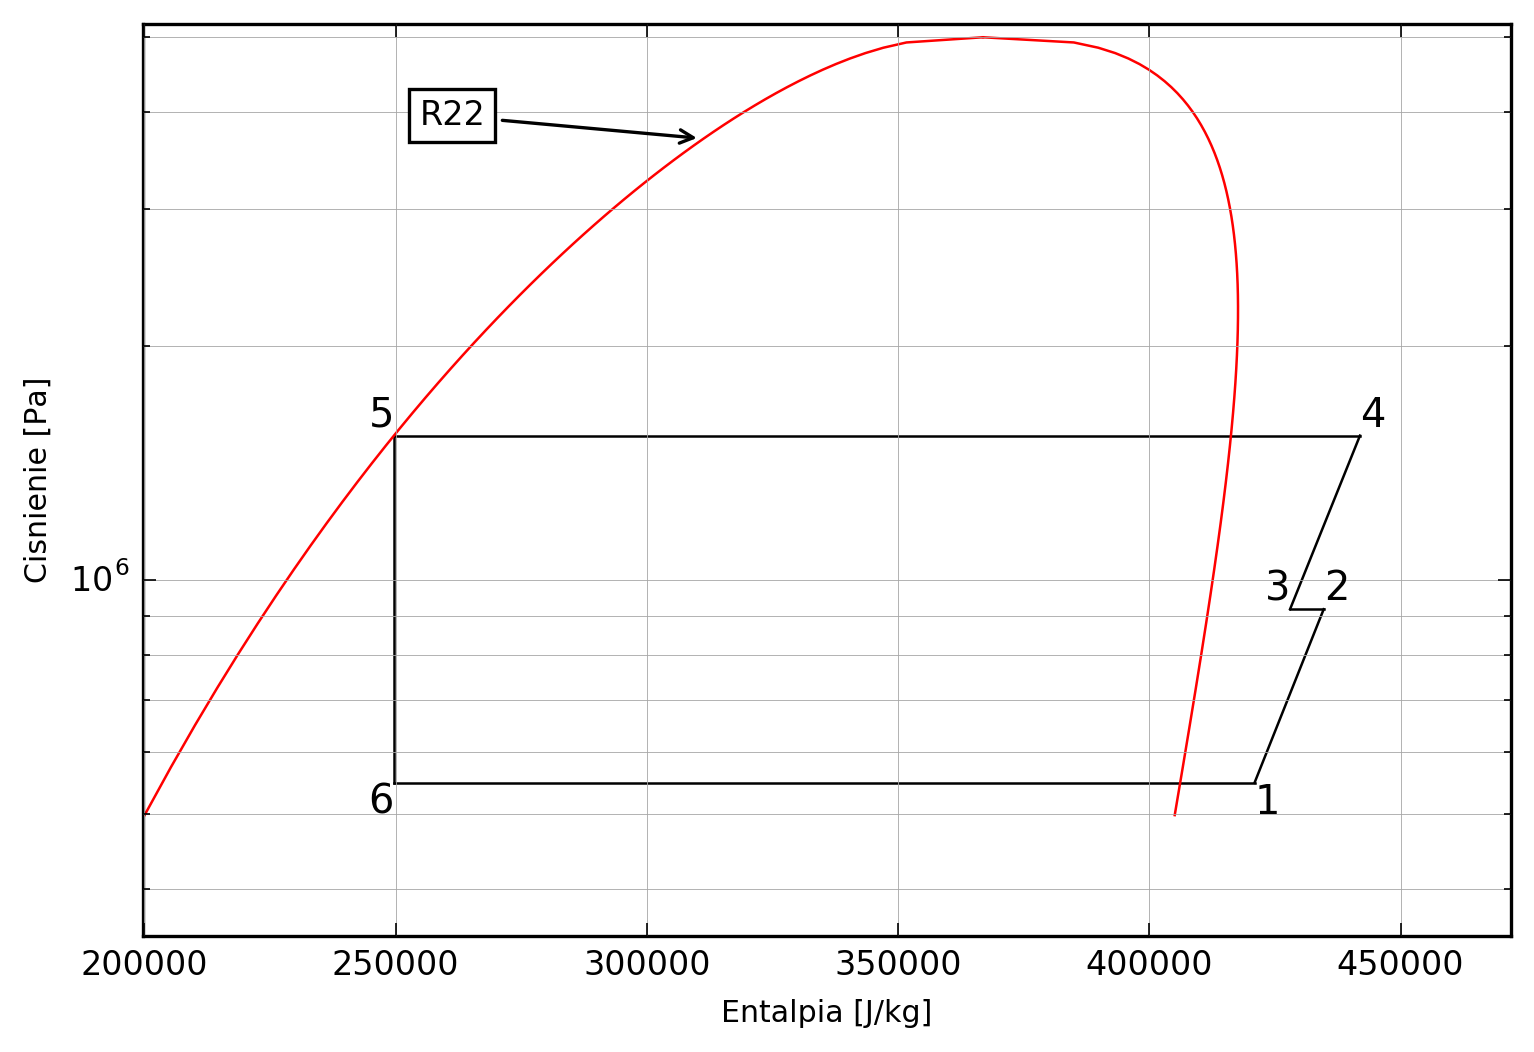

In [7]:
# plot results
plt.figure()

# grid and axes
plt.axes([0.025, 0.025, 0.95, 0.95])
plt.grid(which='major', axis='x', linewidth=0.25, linestyle='-', color='0.65')
plt.grid(which='minor', axis='x', linewidth=0.25, linestyle='-', color='0.65')
plt.grid(which='major', axis='y', linewidth=0.25, linestyle='-', color='0.65')
plt.grid(which='minor', axis='y', linewidth=0.25, linestyle='-', color='0.65')

# data
plt.plot([h6,h1], [p_0,p_0], 'k-', linewidth=0.75)
plt.plot([h1,h2], [p_0,p_m], 'k-', linewidth=0.75)
plt.plot([h2,h3], [p_m,p_m], 'k-', linewidth=0.75)
plt.plot([h3,h4], [p_m,p_k], 'k-', linewidth=0.75)
plt.plot([h4,h5], [p_k,p_k], 'k-', linewidth=0.75)
plt.plot([h5,h6], [p_k,p_0], 'k-', linewidth=0.75)

plt.semilogy(satl, pres, 'r-', linewidth=0.75)
plt.semilogy(satv, pres, 'r-', linewidth=0.75)

# opis punktów
plt.text(h1, p_0, "1", fontsize=12, horizontalalignment='left', verticalalignment='top')
plt.text(h2, p_m, "2", fontsize=12, horizontalalignment='left', verticalalignment='bottom')
plt.text(h3, p_m, "3", fontsize=12, horizontalalignment='right', verticalalignment='bottom')
plt.text(h4, p_k, "4", fontsize=12, horizontalalignment='left', verticalalignment='bottom')
plt.text(h5, p_k, "5", fontsize=12, horizontalalignment='right', verticalalignment='bottom')
plt.text(h6, p_0, "6", fontsize=12, horizontalalignment='right', verticalalignment='top')


plt.annotate(refrigerant, 
             xy=(satl[round(0.7 * steps)],pres[round(0.7 * steps)]), xytext=(satl[round(0.7 * steps)]-50000,pres[round(0.8 * steps)]), bbox=dict(boxstyle="square", fc="w"),
             arrowprops=dict(facecolor='red', arrowstyle="->"), horizontalalignment='center', 
             verticalalignment='top', fontsize=10)

# legend
plt.xlim(h6-50000,h4+30000)
plt.ylim(p_0-200000,p_crit+200000)

plt.xlabel('Entalpia [J/kg]',fontsize=9)
plt.ylabel('Cisnienie [Pa]',fontsize=9)